In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
# Create a file path
filepath = "Resources/dropped_nulls_sorted.csv"

# Read in the data. 
df = pd.read_csv(filepath)

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,98484,Jzef Rajnisz,M,28.0,166.0,67.0,Poland,POL,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Parallel Bars,DNM
1,24720,Manoel Pereira da Silva,M,41.0,165.0,71.0,Portugal,POR,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Small-Bore Rifle, Three Positio...",DNM
2,7915,Bernd Barleben,M,20.0,183.0,79.0,Germany,GER,1960 Summer,1960,Summer,Roma,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Silver
3,7916,Harald Barlie,M,23.0,178.0,83.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",DNM
4,7917,Oddvar Barlie,M,31.0,176.0,79.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",DNM


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196084 entries, 0 to 196083
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      196084 non-null  int64  
 1   Name    196084 non-null  object 
 2   Sex     196084 non-null  object 
 3   Age     196084 non-null  float64
 4   Height  196084 non-null  float64
 5   Weight  196084 non-null  float64
 6   Team    196084 non-null  object 
 7   NOC     196084 non-null  object 
 8   Games   196084 non-null  object 
 9   Year    196084 non-null  int64  
 10  Season  196084 non-null  object 
 11  City    196084 non-null  object 
 12  Sport   196084 non-null  object 
 13  Event   196084 non-null  object 
 14  Medal   196084 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 22.4+ MB


In [4]:
mask = df.Season == "Winter"
df_wint = df.loc[mask]
df_wint.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
7526,36723,"Josefine ""Putzi"" Frandl (-Crotty)",F,29.0,168.0,68.0,Austria,AUT,1960 Winter,1960,Winter,Squaw Valley,Alpine Skiing,Alpine Skiing Women's Giant Slalom,DNM
7527,114802,Giuseppe Steiner,M,30.0,170.0,71.0,Italy,ITA,1960 Winter,1960,Winter,Squaw Valley,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,DNM
7528,67085,"Kenneth ""Ken"" Laufman",M,28.0,175.0,72.0,Canada,CAN,1960 Winter,1960,Winter,Squaw Valley,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
7529,114802,Giuseppe Steiner,M,30.0,170.0,71.0,Italy,ITA,1960 Winter,1960,Winter,Squaw Valley,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,DNM
7530,114802,Giuseppe Steiner,M,30.0,170.0,71.0,Italy,ITA,1960 Winter,1960,Winter,Squaw Valley,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,DNM


In [5]:
df_wint.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38684 entries, 7526 to 182640
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      38684 non-null  int64  
 1   Name    38684 non-null  object 
 2   Sex     38684 non-null  object 
 3   Age     38684 non-null  float64
 4   Height  38684 non-null  float64
 5   Weight  38684 non-null  float64
 6   Team    38684 non-null  object 
 7   NOC     38684 non-null  object 
 8   Games   38684 non-null  object 
 9   Year    38684 non-null  int64  
 10  Season  38684 non-null  object 
 11  City    38684 non-null  object 
 12  Sport   38684 non-null  object 
 13  Event   38684 non-null  object 
 14  Medal   38684 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 4.7+ MB


In [6]:
mask = df.Season == "Summer"
df_summ = df.loc[mask]
df_summ.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,98484,Jzef Rajnisz,M,28.0,166.0,67.0,Poland,POL,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Parallel Bars,DNM
1,24720,Manoel Pereira da Silva,M,41.0,165.0,71.0,Portugal,POR,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Small-Bore Rifle, Three Positio...",DNM
2,7915,Bernd Barleben,M,20.0,183.0,79.0,Germany,GER,1960 Summer,1960,Summer,Roma,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Silver
3,7916,Harald Barlie,M,23.0,178.0,83.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",DNM
4,7917,Oddvar Barlie,M,31.0,176.0,79.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",DNM


In [7]:
df_summ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157400 entries, 0 to 196083
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      157400 non-null  int64  
 1   Name    157400 non-null  object 
 2   Sex     157400 non-null  object 
 3   Age     157400 non-null  float64
 4   Height  157400 non-null  float64
 5   Weight  157400 non-null  float64
 6   Team    157400 non-null  object 
 7   NOC     157400 non-null  object 
 8   Games   157400 non-null  object 
 9   Year    157400 non-null  int64  
 10  Season  157400 non-null  object 
 11  City    157400 non-null  object 
 12  Sport   157400 non-null  object 
 13  Event   157400 non-null  object 
 14  Medal   157400 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 19.2+ MB


In [8]:
df_test = df.head(500)

In [9]:
df_w = df_wint[['Name','Age','Height','Weight']]

In [10]:
# Create a dataframe of the unique names
df_w = df_w.drop_duplicates(subset=['Name'])
df_w.head()

,Name,Age,Height,Weight
7526,"Josefine ""Putzi"" Frandl (-Crotty)",29.0,168.0,68.0
7527,Giuseppe Steiner,30.0,170.0,71.0
7528,"Kenneth ""Ken"" Laufman",28.0,175.0,72.0
7531,Juhani Heikki Kalevi Lahtinen,21.0,172.0,84.0
7532,Shuji Kobayashi,20.0,171.0,65.0


In [11]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13807 entries, 7526 to 182634
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    13807 non-null  object 
 1   Age     13807 non-null  float64
 2   Height  13807 non-null  float64
 3   Weight  13807 non-null  float64
dtypes: float64(3), object(1)
memory usage: 539.3+ KB


In [12]:
# First get rid of all nonmedal datapoints for f
filter = df_wint.Medal != "DNM"
df_wmed = df_wint.loc[filter]
df_wmed.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
7528,67085,"Kenneth ""Ken"" Laufman",M,28.0,175.0,72.0,Canada,CAN,1960 Winter,1960,Winter,Squaw Valley,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
7552,77298,"John William ""Jack"" McCartan",M,24.0,185.0,89.0,United States,USA,1960 Winter,1960,Winter,Squaw Valley,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold
7558,101614,"Richard Peter ""Dick"" Rodenhiser",M,27.0,173.0,70.0,United States,USA,1960 Winter,1960,Winter,Squaw Valley,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold
7560,44484,Helga Haase (Obschernitzki-),F,25.0,160.0,64.0,Germany,GER,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,Speed Skating Women's 500 metres,Gold
7561,44484,Helga Haase (Obschernitzki-),F,25.0,160.0,64.0,Germany,GER,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Women's 1,000 metres",Silver


In [13]:
# Count Medals for athletes who recieved medals and put into dataframe with name
df_wtot = df_wmed.groupby('Name')['Medal'].count().reset_index()
df_wtot

,Name,Medal
0,Aaron Michael Miller,1
1,Adam David Vernon Foote,1
2,Adam Enright,1
3,Adam Henryk Maysz,4
4,Adam Richard Deadmarsh,1
...,...,...
2861,ric Bdard,4
2862,ric Le Chanony,1
2863,rka Zhrobsk-Strachov,1
2864,"sa Annelie Charlotte ""Lotta"" Almblad (-Lindefors)",1


In [14]:
# Combine the dataframe of all athlete names and ages with dataframe of medal count and names

df_wfinal = df_w.merge(df_wtot,how='left', on='Name')
df_wfinal = df_wfinal.fillna(0)

df_wfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13807 entries, 0 to 13806
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    13807 non-null  object 
 1   Age     13807 non-null  float64
 2   Height  13807 non-null  float64
 3   Weight  13807 non-null  float64
 4   Medal   13807 non-null  float64
dtypes: float64(4), object(1)
memory usage: 539.5+ KB


The r-squared is: 0.0027719444295608692


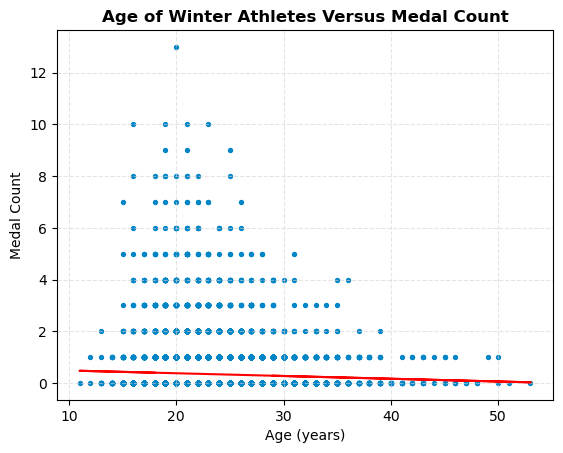

In [35]:
# USING LINREGRESS
x_values = df_wfinal.Age
y_values = df_wfinal.Medal

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, 8, color='#0085C7')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Age (years)')
plt.ylabel('Medal Count')
plt.title('Age of Winter Athletes Versus Medal Count',weight='bold')
plt.grid(color="lightgrey", linestyle="--", alpha=0.6)

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [20]:
df_s = df_summ[['Name','Age','Height','Weight']]

In [21]:
df_s = df_s.drop_duplicates(subset=['Name'])
df_s.head()

,Name,Age,Height,Weight
0,Jzef Rajnisz,28.0,166.0,67.0
1,Manoel Pereira da Silva,41.0,165.0,71.0
2,Bernd Barleben,20.0,183.0,79.0
3,Harald Barlie,23.0,178.0,83.0
4,Oddvar Barlie,31.0,176.0,79.0


In [22]:
filter = df_summ.Medal != "DNM"
df_smed = df_summ.loc[filter]
df_smed.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,7915,Bernd Barleben,M,20.0,183.0,79.0,Germany,GER,1960 Summer,1960,Summer,Roma,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Silver
17,106060,Imre Stori (Schwertz),M,23.0,170.0,69.0,Hungary,HUN,1960 Summer,1960,Summer,Roma,Football,Football Men's Football,Bronze
67,125989,Gyz Veres,M,24.0,165.0,78.5,Hungary,HUN,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Middleweight,Bronze
91,69941,Jorma Johannes Limmonen,M,25.0,168.0,56.0,Finland,FIN,1960 Summer,1960,Summer,Roma,Boxing,Boxing Men's Featherweight,Bronze
109,126299,Angelo Vicardi,M,23.0,167.0,70.0,Italy,ITA,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Team All-Around,Bronze


In [23]:
df_stot = df_smed.groupby('Name')['Medal'].count().reset_index()
df_stot

,Name,Medal
0,"A. Joshua ""Josh"" West",1
1,Aage Birch,1
2,"Aagje ""Ada"" Kok (-van der Linden)",3
3,Aaron Brown,1
4,Aaron Egbele,1
...,...,...
16337,va Dnusz,2
16338,va Erds,1
16339,va Rakusz,2
16340,va Risztov,1


In [24]:
df_sfinal = df_s.merge(df_stot,how='left', on='Name')
df_sfinal = df_sfinal.fillna(0)

df_sfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81111 entries, 0 to 81110
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    81111 non-null  object 
 1   Age     81111 non-null  float64
 2   Height  81111 non-null  float64
 3   Weight  81111 non-null  float64
 4   Medal   81111 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.1+ MB


The r-squared is: 0.007949960203400299


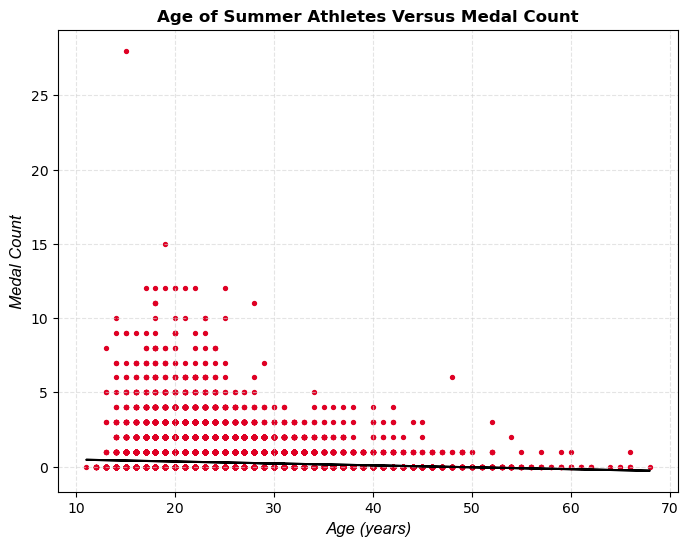

In [29]:
# USING LINREGRESS
x_values = df_sfinal.Age
y_values = df_sfinal.Medal

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(x_values,y_values, 8,color='#DF0024')
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
plt.xlabel('Age (years)',style='italic', size=12, fontproperties='Arial')
plt.ylabel('Medal Count',style='italic', size=12, fontproperties='Arial')
plt.title('Age of Summer Athletes Versus Medal Count',weight='bold')
plt.grid(color="lightgrey", linestyle="--", alpha=0.6)

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.000674927602212412


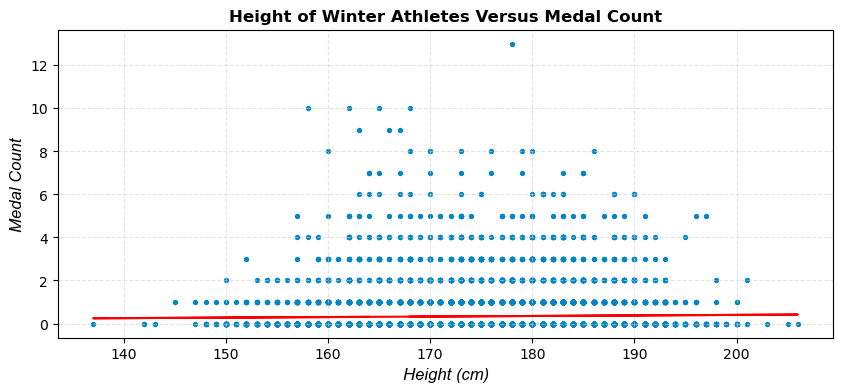

In [38]:
# USING LINREGRESS
x_values = df_wfinal.Height
y_values = df_wfinal.Medal

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,4))
plt.scatter(x_values,y_values, 8,color='#0085C7')
plt.plot(x_values,regress_values,"red")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Height (cm)',style='italic', size=12, fontproperties='Arial')
plt.ylabel('Medal Count',style='italic', size=12, fontproperties='Arial')
plt.title('Height of Winter Athletes Versus Medal Count',weight='bold')
plt.grid(color="lightgrey", linestyle="--", alpha=0.6)
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00023713760453916615


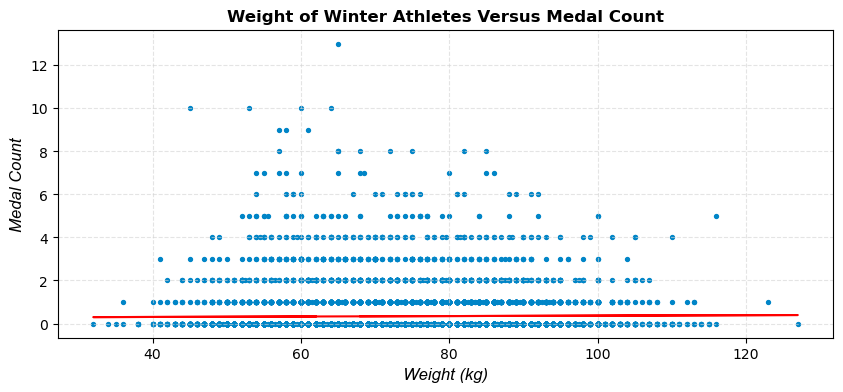

In [39]:
# USING LINREGRESS
x_values = df_wfinal.Weight
y_values = df_wfinal.Medal

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,4))
plt.scatter(x_values,y_values, 8,color='#0085C7')
plt.plot(x_values,regress_values,"red")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
plt.xlabel('Weight (kg)',style='italic', size=12, fontproperties='Arial')
plt.ylabel('Medal Count',style='italic', size=12, fontproperties='Arial')
plt.title('Weight of Winter Athletes Versus Medal Count',weight='bold')
plt.grid(color="lightgrey", linestyle="--", alpha=0.6)

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.003427651821999619


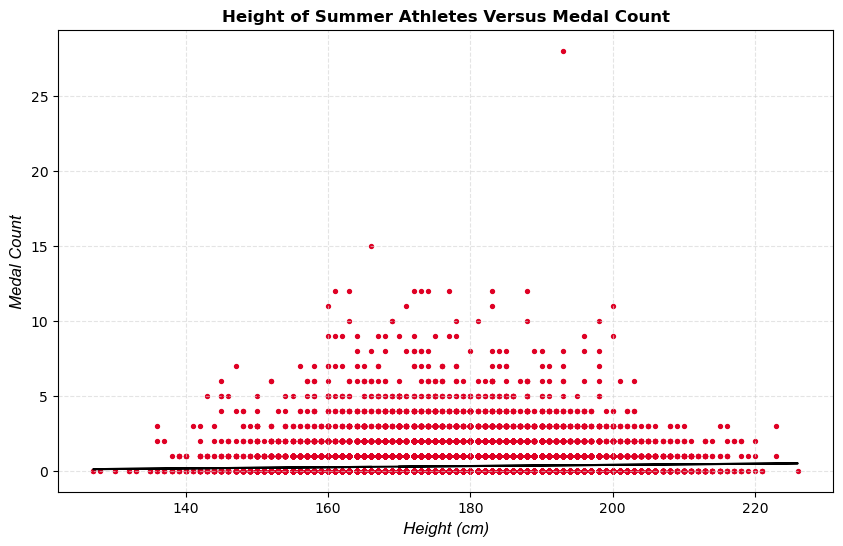

In [32]:
# USING LINREGRESS
x_values = df_sfinal.Height
y_values = df_sfinal.Medal

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values, 8,color='#DF0024')
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Height (cm)',style='italic', size=12, fontproperties='Arial')
plt.ylabel('Medal Count',style='italic', size=12, fontproperties='Arial')
plt.title('Height of Summer Athletes Versus Medal Count',weight='bold')
plt.grid(color="lightgrey", linestyle="--", alpha=0.6)


print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0031352041379851207


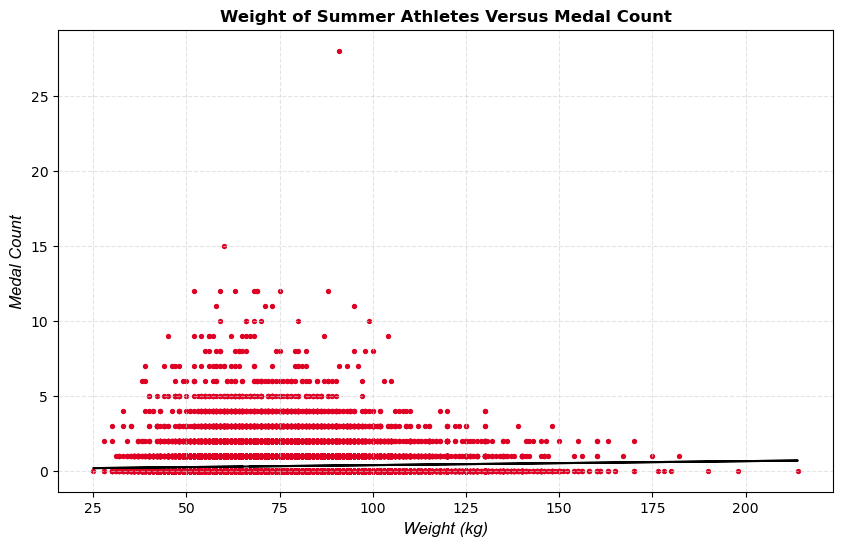

In [33]:
# USING LINREGRESS
x_values = df_sfinal.Weight
y_values = df_sfinal.Medal

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values, 8,color='#DF0024')
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (kg)',style='italic', size=12, fontproperties='Arial')
plt.ylabel('Medal Count',style='italic', size=12, fontproperties='Arial')
plt.title('Weight of Summer Athletes Versus Medal Count',weight='bold')
plt.grid(color="lightgrey", linestyle="--", alpha=0.6)

print(f"The r-squared is: {rvalue**2}")
plt.show()